In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import matplotlib.pyplot as plt
import wordcloud;
import numpy as np ;

In [2]:
allAnswers=pd.read_csv('allanswers.csv', low_memory=False);
allAnswers

,id,creation_date,owner_display_name,owner_user_id,parent_id,post_type_id,score,location
0,50673382,2018-06-04 04:24:49.113 UTC,NaN,9090552,50559243,2,0,"Manipal, Karnataka, India"
1,50673383,2018-06-04 04:24:53.873 UTC,NaN,9882416,50673291,2,0,"Trivandrum, Kerala, India"
2,50673391,2018-06-04 04:26:31.31 UTC,NaN,1641714,50657312,2,0,"Bengaluru, Karnataka, India"
3,50673423,2018-06-04 04:30:46.7 UTC,NaN,5336439,50672539,2,0,"Ahmedabad, India"
4,50673457,2018-06-04 04:37:03.36 UTC,NaN,978866,50673397,2,0,"Ahmadabad, India"
...,...,...,...,...,...,...,...,...
4759072,40053596,2016-10-15 00:00:06.09 UTC,NaN,85785,40052856,2,2,"New York, United States"
4759073,39994319,2016-10-12 08:49:28.773 UTC,NaN,5658512,39994234,2,2,"Puducherry, India"
4759074,40195119,2016-10-22 17:39:29.217 UTC,NaN,5429428,40194282,2,4,"Janakpuri District Center, Delhi, India"
4759075,40323810,2016-10-29 21:23:30.267 UTC,NaN,289011,40323192,2,0,"NY, United States"


In [3]:
allAnswers.creation_date.isnull().any()

False

In [4]:
allAnswers['creation_date']=pd.to_datetime(allAnswers['creation_date']).dt.date
allAnswers

,id,creation_date,owner_display_name,owner_user_id,parent_id,post_type_id,score,location
0,50673382,2018-06-04,NaN,9090552,50559243,2,0,"Manipal, Karnataka, India"
1,50673383,2018-06-04,NaN,9882416,50673291,2,0,"Trivandrum, Kerala, India"
2,50673391,2018-06-04,NaN,1641714,50657312,2,0,"Bengaluru, Karnataka, India"
3,50673423,2018-06-04,NaN,5336439,50672539,2,0,"Ahmedabad, India"
4,50673457,2018-06-04,NaN,978866,50673397,2,0,"Ahmadabad, India"
...,...,...,...,...,...,...,...,...
4759072,40053596,2016-10-15,NaN,85785,40052856,2,2,"New York, United States"
4759073,39994319,2016-10-12,NaN,5658512,39994234,2,2,"Puducherry, India"
4759074,40195119,2016-10-22,NaN,5429428,40194282,2,4,"Janakpuri District Center, Delhi, India"
4759075,40323810,2016-10-29,NaN,289011,40323192,2,0,"NY, United States"


In [5]:
allUsers=pd.read_csv('allusers.csv', low_memory=False);
allUsers

,id,display_name,creation_date,location,reputation,up_votes,down_votes,views
0,567576,drmirror,2011-01-07 22:52:23.133 UTC,"New York, United States",3230,167,1,172
1,575842,Sodino,2011-01-14 15:30:23.58 UTC,"D.C., DC, United States",146,18,1,21
2,593053,dsjoerg,2011-01-27 23:29:49.663 UTC,"New York, United States",563,75,5,118
3,612333,rodly,2011-02-11 00:51:08.667 UTC,"Ann Arbor, MI, United States",149,29,0,30
4,613697,Andy Cohen,2011-02-11 22:02:31.337 UTC,"Minneapolis, MN, United States",164,75,3,52
...,...,...,...,...,...,...,...,...
895927,8805668,vishalgada,2017-10-20 09:09:27.283 UTC,"Bangalore, Karnataka, India",41,1,0,14
895928,3408275,Anubhav,2014-03-11 22:47:58.417 UTC,"Bangalore, India",41,1,0,14
895929,6914996,user6914996,2016-10-03 10:03:18.503 UTC,"Delhi, India",41,1,0,14
895930,2105649,AndrewRota,2013-02-24 23:48:34.213 UTC,"Boston, MA, United States",41,3,0,14


In [6]:
pakUsers=allUsers[allUsers['location'].str.contains('Pakistan')]
pakUsers

,id,display_name,creation_date,location,reputation,up_votes,down_votes,views
24,840186,Saadi,2011-07-12 06:47:57.29 UTC,"Mardan, Pakistan",973,22,1,103
40,961136,Abid Hussain,2011-09-23 12:25:14.587 UTC,"Lahore, Pakistan",1366,51,4,213
52,1137199,dotNET,2012-01-08 15:10:15.58 UTC,"Islamabad, Pakistan",24395,4053,85,3679
55,1152014,Usman,2012-01-16 14:21:31.073 UTC,Pakistan,580,14,1,27
90,1346433,Akhtar,2012-04-20 11:42:54.067 UTC,"Lahore, Pakistan",2695,116,3,169
...,...,...,...,...,...,...,...,...
895843,11055910,Muhammad Naeem,2019-02-13 10:42:06.733 UTC,"Lahore, Pakistan",41,3,0,11
895848,2818279,GNChishti,2013-09-26 06:55:07.437 UTC,Pakistan,41,2,0,12
895889,10513552,AhmAr KAka,2018-10-16 14:31:42.057 UTC,"Islamabad, Pakistan",41,4,0,13
895913,1652417,PicSonics,2012-09-06 15:00:06.437 UTC,"Islamabad, Pakistan",41,1,0,14


In [7]:
pakAnswers=pd.merge(allAnswers,pakUsers,left_on='owner_user_id',right_on='id',how='inner')
pakAnswers

,id_x,creation_date_x,owner_display_name,owner_user_id,parent_id,post_type_id,score,location_x,id_y,display_name,creation_date_y,location_y,reputation,up_votes,down_votes,views
0,50674835,2018-06-04,NaN,5969346,50674093,2,0,"Punjab, Pakistan",5969346,Rehan Haider,2016-02-23 15:20:54.767 UTC,"Punjab, Pakistan",692,470,3,86
1,51021989,2018-06-25,NaN,5969346,51021663,2,0,"Punjab, Pakistan",5969346,Rehan Haider,2016-02-23 15:20:54.767 UTC,"Punjab, Pakistan",692,470,3,86
2,51152663,2018-07-03,NaN,5969346,51152526,2,0,"Punjab, Pakistan",5969346,Rehan Haider,2016-02-23 15:20:54.767 UTC,"Punjab, Pakistan",692,470,3,86
3,51022584,2018-06-25,NaN,5969346,51022144,2,1,"Punjab, Pakistan",5969346,Rehan Haider,2016-02-23 15:20:54.767 UTC,"Punjab, Pakistan",692,470,3,86
4,51081699,2018-06-28,NaN,5969346,51080730,2,5,"Punjab, Pakistan",5969346,Rehan Haider,2016-02-23 15:20:54.767 UTC,"Punjab, Pakistan",692,470,3,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135447,40339099,2016-10-31,NaN,6789889,40338307,2,1,"Lahore, Punjab, Pakistan",6789889,Zohaib Ali,2016-09-03 05:02:10.42 UTC,"Lahore, Punjab, Pakistan",26,4,0,0
135448,40042565,2016-10-14,NaN,5625344,40042053,2,0,Pakistan,5625344,Zeshan Masood,2015-12-01 11:15:53.123 UTC,Pakistan,1,0,0,5
135449,39990061,2016-10-12,NaN,6580682,37903608,2,-1,Pakistan,6580682,Danish Amanat,2016-07-12 17:20:45.487 UTC,Pakistan,21,0,0,7
135450,39883113,2016-10-05,NaN,6893928,29443876,2,0,"Karachi, Sindh, Pakistan",6893928,Hamza Azam,2016-09-28 13:09:18.487 UTC,"Karachi, Sindh, Pakistan",19,3,0,131


In [8]:
indiaUsers=allUsers[allUsers['location'].str.contains('India')]
indiaUsers


,id,display_name,creation_date,location,reputation,up_votes,down_votes,views
7,676300,Rajeev,2011-03-25 07:41:35.313 UTC,"Hyderabad, India",136,47,0,94
8,677745,abnvp,2011-03-26 05:16:45.743 UTC,"Hyderabad, India",1007,91,3,136
10,694240,M.A.Murali,2011-04-06 05:49:49.383 UTC,"Madurai, India",8158,29,0,1457
11,706105,Rushikesh,2011-04-13 13:10:33.203 UTC,"Pune, India",531,0,0,192
12,710706,Thangamani J,2011-04-16 00:14:50.39 UTC,"Chennai, India",25,0,0,22
...,...,...,...,...,...,...,...,...
895924,5164420,Rahul Sen,2015-07-28 10:25:58.993 UTC,"Bhubaneswar, Odisha, India",41,6,0,14
895925,7420375,Vinay Kumar,2017-01-15 03:12:14.06 UTC,"Hyderabad, Telangana, India",41,0,0,14
895927,8805668,vishalgada,2017-10-20 09:09:27.283 UTC,"Bangalore, Karnataka, India",41,1,0,14
895928,3408275,Anubhav,2014-03-11 22:47:58.417 UTC,"Bangalore, India",41,1,0,14


In [9]:
indiaAnswers=pd.merge(allAnswers,indiaUsers,left_on='owner_user_id',right_on='id',how='inner')
indiaAnswers

,id_x,creation_date_x,owner_display_name,owner_user_id,parent_id,post_type_id,score,location_x,id_y,display_name,creation_date_y,location_y,reputation,up_votes,down_votes,views
0,50673382,2018-06-04,NaN,9090552,50559243,2,0,"Manipal, Karnataka, India",9090552,Diptark Bose,2017-12-12 19:17:19.903 UTC,"Manipal, Karnataka, India",11,0,0,14
1,50673383,2018-06-04,NaN,9882416,50673291,2,0,"Trivandrum, Kerala, India",9882416,Thaks,2018-06-01 16:46:16.723 UTC,"Trivandrum, Kerala, India",138,12,2,35
2,50674538,2018-06-04,NaN,9882416,50672563,2,0,"Trivandrum, Kerala, India",9882416,Thaks,2018-06-01 16:46:16.723 UTC,"Trivandrum, Kerala, India",138,12,2,35
3,50677590,2018-06-04,NaN,9882416,50676341,2,0,"Trivandrum, Kerala, India",9882416,Thaks,2018-06-01 16:46:16.723 UTC,"Trivandrum, Kerala, India",138,12,2,35
4,50649672,2018-06-01,NaN,9882416,50649547,2,0,"Trivandrum, Kerala, India",9882416,Thaks,2018-06-01 16:46:16.723 UTC,"Trivandrum, Kerala, India",138,12,2,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878174,40351387,2016-10-31,NaN,3875581,40350396,2,1,"Bengaluru, India",3875581,Eswara Sai,2014-07-25 05:14:42.83 UTC,"Bengaluru, India",26,0,0,1
1878175,40056683,2016-10-15,NaN,3040221,40056629,2,0,India,3040221,Binary Geek,2013-11-27 04:49:22.617 UTC,India,103,43,0,6
1878176,40307239,2016-10-28,NaN,7085544,40307094,2,1,"Bangalore, India",7085544,Adithya,2016-10-28 13:34:57.253 UTC,"Bangalore, India",58,14,0,12
1878177,40205828,2016-10-23,NaN,7061212,31441401,2,44,India,7061212,Vaibhav Arora,2016-10-23 17:27:35.557 UTC,India,452,14,1,15


In [10]:
usaUsers=allUsers[allUsers['location'].str.contains('USA')|allUsers['location'].str.contains('United States')]
usaUsers

,id,display_name,creation_date,location,reputation,up_votes,down_votes,views
0,567576,drmirror,2011-01-07 22:52:23.133 UTC,"New York, United States",3230,167,1,172
1,575842,Sodino,2011-01-14 15:30:23.58 UTC,"D.C., DC, United States",146,18,1,21
2,593053,dsjoerg,2011-01-27 23:29:49.663 UTC,"New York, United States",563,75,5,118
3,612333,rodly,2011-02-11 00:51:08.667 UTC,"Ann Arbor, MI, United States",149,29,0,30
4,613697,Andy Cohen,2011-02-11 22:02:31.337 UTC,"Minneapolis, MN, United States",164,75,3,52
...,...,...,...,...,...,...,...,...
895916,7583721,Frank_Cerny,2017-02-18 02:59:34.513 UTC,"Columbus, OH, United States",41,2,0,14
895918,1773443,benley,2012-10-25 07:36:51.123 UTC,"Boston, MA, United States",41,0,0,14
895926,7536717,Bill Johnson,2017-02-08 20:25:58.62 UTC,"Houston, TX, United States",41,0,0,14
895930,2105649,AndrewRota,2013-02-24 23:48:34.213 UTC,"Boston, MA, United States",41,3,0,14


In [11]:
usaAnswers=pd.merge(allAnswers,usaUsers,left_on='owner_user_id',right_on='id',how='inner')
usaAnswers

,id_x,creation_date_x,owner_display_name,owner_user_id,parent_id,post_type_id,score,location_x,id_y,display_name,creation_date_y,location_y,reputation,up_votes,down_votes,views
0,50673468,2018-06-04,NaN,568209,50673125,2,0,"San Mateo, CA, United States",568209,Ben Thul,2011-01-08 17:50:06.657 UTC,"San Mateo, CA, United States",24362,405,25,1293
1,50752481,2018-06-08,NaN,568209,50737243,2,0,"San Mateo, CA, United States",568209,Ben Thul,2011-01-08 17:50:06.657 UTC,"San Mateo, CA, United States",24362,405,25,1293
2,51267171,2018-07-10,NaN,568209,51260828,2,1,"San Mateo, CA, United States",568209,Ben Thul,2011-01-08 17:50:06.657 UTC,"San Mateo, CA, United States",24362,405,25,1293
3,51175836,2018-07-04,NaN,568209,51152443,2,0,"San Mateo, CA, United States",568209,Ben Thul,2011-01-08 17:50:06.657 UTC,"San Mateo, CA, United States",24362,405,25,1293
4,50948840,2018-06-20,NaN,568209,50938102,2,2,"San Mateo, CA, United States",568209,Ben Thul,2011-01-08 17:50:06.657 UTC,"San Mateo, CA, United States",24362,405,25,1293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537332,40010305,2016-10-13,NaN,6490084,13857331,2,26,"Southfield, MI, United States",6490084,dasiimwe,2016-06-20 16:00:10.253 UTC,"Southfield, MI, United States",301,0,0,11
1537333,39922893,2016-10-07,NaN,5759045,39921445,2,0,"Portland, OR, United States",5759045,Ant,2016-01-07 18:05:24.02 UTC,"Portland, OR, United States",1,0,0,0
1537334,40116112,2016-10-18,NaN,7037375,40115151,2,0,"Minneapolis, MN, United States",7037375,John,2016-10-18 14:56:40.863 UTC,"Minneapolis, MN, United States",1,0,0,1
1537335,40325210,2016-10-30,NaN,7087068,40324913,2,0,"San Diego, CA, United States",7087068,Bill Flint,2016-10-28 20:00:32.627 UTC,"San Diego, CA, United States",1,0,0,1


In [12]:
pakGroupedAnswers = pakAnswers.groupby('creation_date_x')
groupedAnswersCount=pakGroupedAnswers['creation_date_x'].agg(['count'])
groupedAnswersCount.rename(columns={'count':'Pakistan'}, 
                 inplace=True)
groupedAnswersCount

,Pakistan
creation_date_x,
2011-01-04,1
2011-01-06,2
2011-01-07,1
2011-01-12,2
2011-01-13,1
...,...
2019-08-27,72
2019-08-28,109
2019-08-29,91


In [13]:
indiaGroupedAnswers = indiaAnswers.groupby('creation_date_x')
groupedAnswersCount['India']=indiaGroupedAnswers['creation_date_x'].agg(['count'])
groupedAnswersCount

,Pakistan,India
creation_date_x,,
2011-01-04,1,9
2011-01-06,2,4
2011-01-07,1,8
2011-01-12,2,19
2011-01-13,1,14
...,...,...
2019-08-27,72,821
2019-08-28,109,844
2019-08-29,91,812


In [14]:
usaGroupedAnswers = usaAnswers.groupby('creation_date_x')
groupedAnswersCount['USA']=usaGroupedAnswers['creation_date_x'].agg(['count'])
groupedAnswersCount

,Pakistan,India,USA
creation_date_x,,,
2011-01-04,1,9,29
2011-01-06,2,4,19
2011-01-07,1,8,17
2011-01-12,2,19,7
2011-01-13,1,14,14
...,...,...,...
2019-08-27,72,821,647
2019-08-28,109,844,637
2019-08-29,91,812,670


[Text(0, 0.5, 'No of Answers'), Text(0.5, 0, 'Years')]

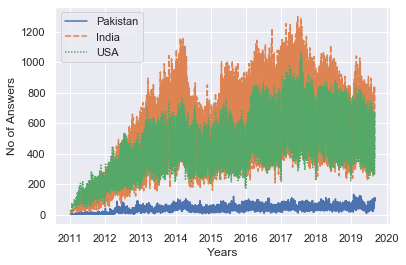

In [19]:
if 'count' in groupedAnswersCount.columns:groupedAnswersCount=groupedAnswersCount.drop(['count'],axis=1)
sns.set()
ax=sns.lineplot(data=groupedAnswersCount)
ax.set(xlabel='Years', ylabel='No of Answers')
